<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task7/Worksheet_of_7_XGBoost_tugasxgboost1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

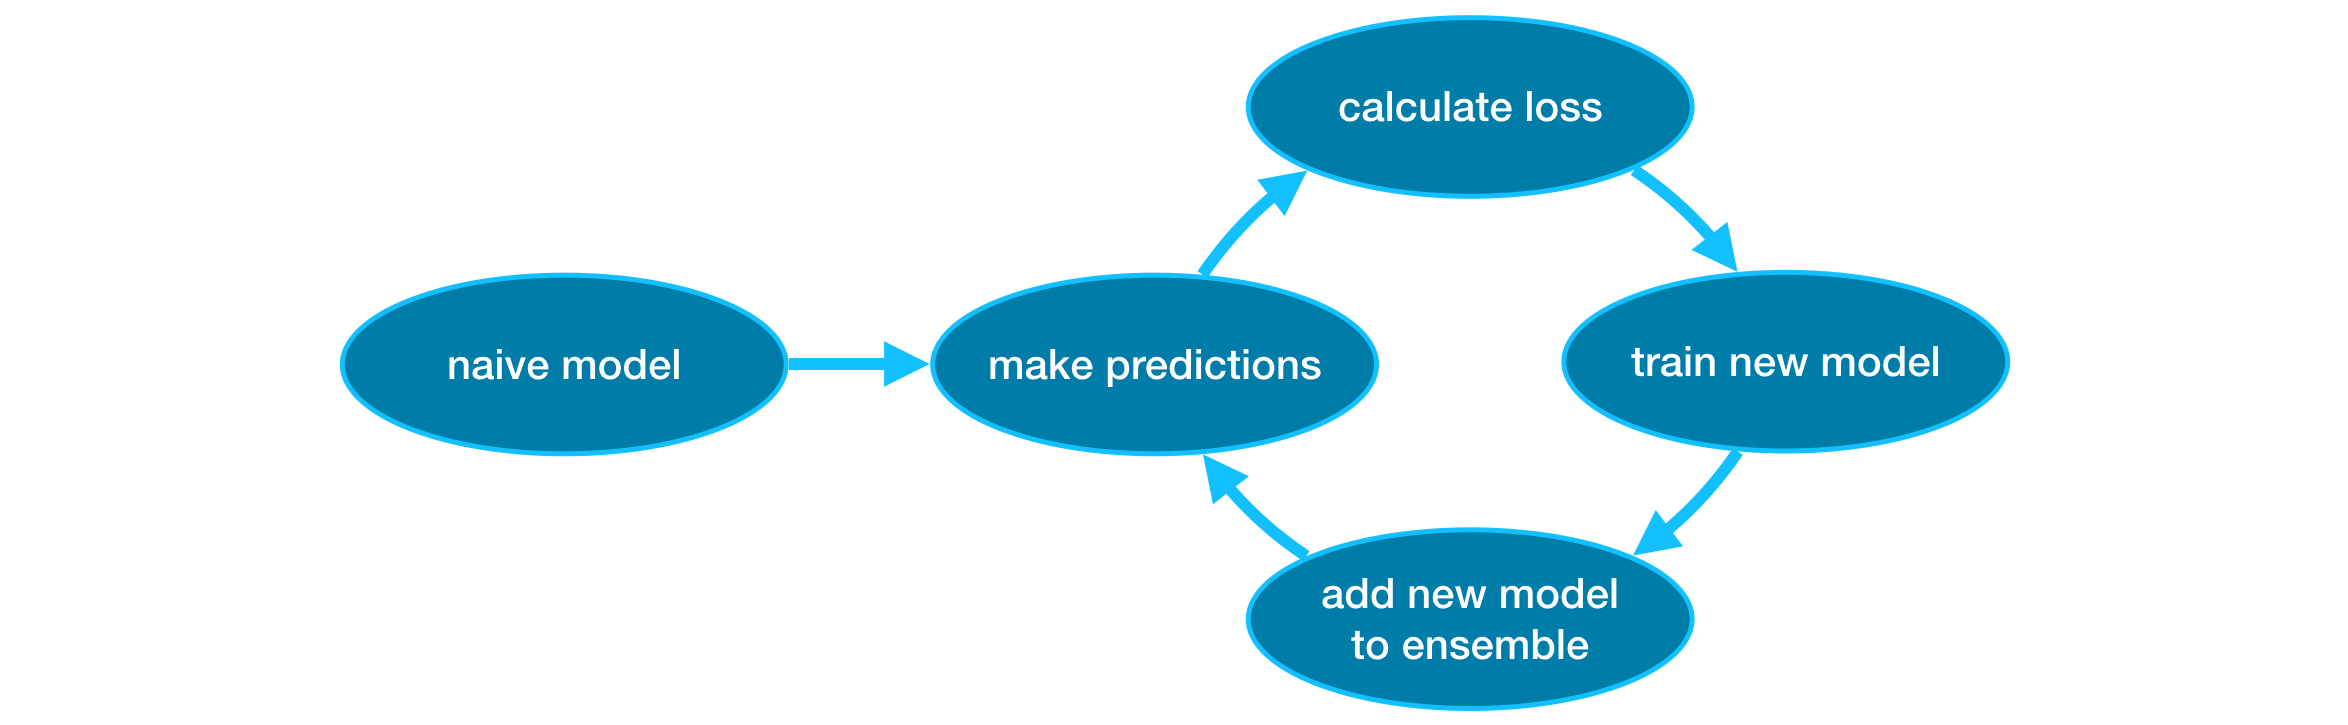

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [25]:
# Cell 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Penjelasan:
# Mount Google Drive agar data di dalamnya dapat diakses langsung di Google Colab.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [27]:
# Membaca dataset dan menghilangkan baris pertama yang salah
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost (1).csv'  # Sesuaikan dengan path Anda
data = pd.read_csv(file_path, skiprows=1)

# Periksa dataset untuk memastikan baris header telah dihapus
print(data.head())
print(data.columns)

# Pastikan nama kolom benar
data.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Class']

# Memastikan data bersih
print(data.head())


    7.4   0.7   0.0  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4  5
0   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8  5
1   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8  5
2  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8  6
3   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4  5
4   7.4  0.66  0.00  1.8  75.0  13.0  40.0    0.9978  3.51  0.56  9.4  5
Index(['7.4', '0.7', '0.0', '1.9', '76.0', '11.0', '34.0', '0.9978', '3.51',
       '0.56', '9.4', '5'],
      dtype='object')
     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11  Class
0   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8      5
1   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8      5
2  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8      6
3   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5
4   7.4  0.66  0.00  1.8  75.0  13.0  40.0    0.99

**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [28]:
# Memilih kolom predictors dan target
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
target = 'Class'

X = data[predictors]
y = data[target]

# Mengisi nilai NaN
X = X.fillna(0)
y = y.fillna(0)

In [23]:
print(data.columns)
print(data.head())


Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Class'],
      dtype='object')
     X1    X2    X3   X4    X5    X6    X7      X8    X9   X10  X11  Class
0    X1    X2    X3   X4    X5    X6    X7      X8    X9   X10  X11  Class
1   7.4   0.7   0.0  1.9  76.0  11.0  34.0  0.9978  3.51  0.56  9.4      5
2   7.8  0.88   0.0  2.6  98.0  25.0  67.0  0.9968   3.2  0.68  9.8      5
3   7.8  0.76  0.04  2.3  92.0  15.0  54.0   997.0  3.26  0.65  9.8      5
4  11.2  0.28  0.56  1.9  75.0  17.0  60.0   998.0  3.16  0.58  9.8      6


**Prompt:**

Write a code cell to split the data into training and validation

In [29]:
# Cell 4: Membagi data menjadi training dan validation
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Menampilkan ukuran data pelatihan dan validasi
print(f"Training data shape: {X_train.shape}, Validation data shape: {X_valid.shape}")

# Penjelasan:
# `train_test_split` memisahkan data menjadi dua bagian: pelatihan untuk melatih model dan validasi untuk evaluasi.


Training data shape: (1278, 11), Validation data shape: (320, 11)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [32]:
# Cell 5: Melatih model menggunakan XGBoost dan menghitung MAE
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model
model = XGBRegressor()

# Melatih model
model.fit(X_train, y_train)

# Prediksi dan menghitung MAE
preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
print(f"Mean Absolute Error: {mae}")

# Penjelasan:
# MAE mengukur seberapa besar kesalahan rata-rata dalam prediksi. Nilai yang lebih kecil menunjukkan performa yang lebih baik.


Mean Absolute Error: 0.41042032837867737


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [33]:
# Cell 6: XGBRegressor dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500)
model_500.fit(X_train, y_train)

# Prediksi dan menghitung MAE
preds_500 = model_500.predict(X_valid)
mae_500 = mean_absolute_error(y_valid, preds_500)
print(f"Mean Absolute Error with 500 estimators: {mae_500}")

# Penjelasan:
# Menambahkan jumlah estimators biasanya meningkatkan akurasi hingga batas tertentu.


Mean Absolute Error with 500 estimators: 0.40372854471206665


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [34]:
# Cell 7: XGBRegressor dengan learning rate dan early stopping
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.1, early_stopping_rounds=10)

# Melatih model
model_custom.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Prediksi dan menghitung MAE
preds_custom = model_custom.predict(X_valid)
mae_custom = mean_absolute_error(y_valid, preds_custom)
print(f"Mean Absolute Error with custom parameters: {mae_custom}")

# Penjelasan:
# Early stopping menghentikan pelatihan jika tidak ada peningkatan pada validation set.


Mean Absolute Error with custom parameters: 0.45807892084121704


<Figure size 1000x800 with 0 Axes>

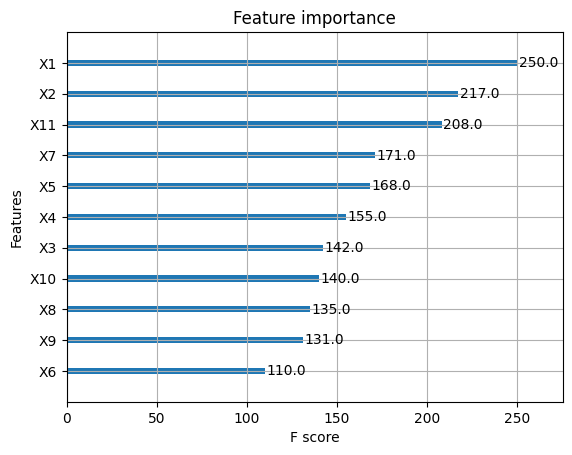

In [35]:
# Cell 8: Visualisasi Feature Importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model_custom)
plt.show()

# Penjelasan:
# Feature importance membantu memahami fitur mana yang paling memengaruhi prediksi model.


<Figure size 2000x1000 with 0 Axes>

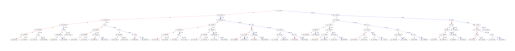

In [36]:
# Cell 9: Visualisasi Struktur Pohon
from xgboost import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model_custom, num_trees=0)
plt.show()

# Penjelasan:
# Struktur pohon menunjukkan cara model membuat keputusan berdasarkan fitur.


KeyError: 'validation_1'

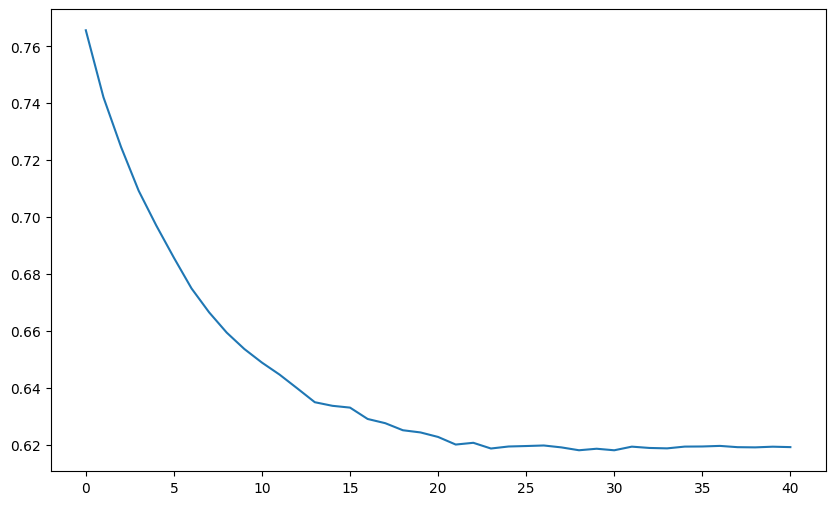

In [37]:
# Cell 10: Visualisasi Learning Curve
results = model_custom.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.show()

# Penjelasan:
# Learning curve menunjukkan performa model selama pelatihan pada data training dan validasi.


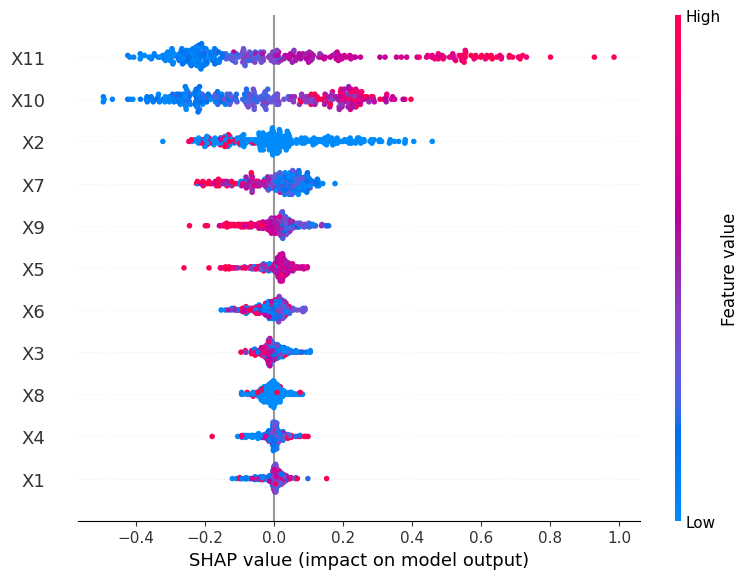

In [38]:
# Cell 11: SHAP Values
import shap

explainer = shap.Explainer(model_custom)
shap_values = explainer(X_valid)

shap.summary_plot(shap_values, X_valid)

# Penjelasan:
# SHAP values memberikan interpretasi pentingnya fitur untuk setiap prediksi.
